# Подготовка (pandas, numpy, etc)

## numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_pred = np.array([0.9, 0.2, 0.1, 0.4, 0.9])
y_ans = np.array([1, 0, 0, 1, 1])

### 1. $L_1$ норма
Напишите функцию, которая для двух векторов вычисляет их $L_1$ норму ("манхэттенское расстояние" или "расстояние городских кварталов"):
$$\begin{align*} & L_1(y_{pred}, y) = \sum_{i=0}^m|y^{(i)} - y_{pred}^{(i)}| \end{align*}$$  

In [2]:
def L1_norm(y_pred, y_ans):
    if len(y_pred) == len(y_ans): return sum([abs(y_ans[i] - y_pred[i]) for i in range(len(y_pred))])
    else: return None
assert round(L1_norm(y_pred, y_ans), 1) == 1.1, 'Неверно реализован расчёт'

In [3]:
print(f"L1 = {L1_norm(y_pred, y_ans)}")

L1 = 1.1


### 2. $L_2$ норма
Напишите функцию, которая для двух векторов вычисляет их $L_2$ норму (евклидово расстояние):
$$\begin{align*} & L_2(y_{pred},y) = \sum_{i=0}^m(y^{(i)} - y_{pred}^{(i)})^2 \end{align*}$$

In [4]:
def L2_norm(y_pred, y_ans):
    if len(y_pred) == len(y_ans): return sum([(y_ans[i] - y_pred[i])**2 for i in range(len(y_pred))])
    else: return None
assert round(L2_norm(y_pred, y_ans), 3) == 0.43, 'Неверно реализован расчёт'

In [5]:
print(f"L2 = {L2_norm(y_pred, y_ans)}") 

L2 = 0.43


### 3. Строки с одинаковыми значениями
Напишите функцию, которая для 2-мерной матрицы произвольного размера возвращает все строки, содержащие только одинаковые значения (напр. [2, 2, 2, 2])

In [6]:
np.random.seed(777)
Z = np.random.randint(0, 5, (6, 5))
Z_eq = np.array((np.ones(5), np.zeros(5)))
Z = np.vstack((Z, Z_eq))
print(Z)

[[3. 1. 4. 1. 2.]
 [0. 2. 0. 3. 1.]
 [2. 4. 1. 3. 2.]
 [2. 2. 4. 0. 2.]
 [2. 4. 0. 0. 0.]
 [3. 2. 2. 0. 3.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]


In [7]:
def all_the_same(X):
    return [row for row in X if len(set(row)) == 1]

In [8]:
print("Строки с одинаковыми значениями:\n", all_the_same(Z))

Строки с одинаковыми значениями:
 [array([1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0.])]


## pandas

__Прочитайте "telecom_churn.csv" в датафрейм__

In [9]:
df = pd.read_csv('telecom_churn.csv')

__Выведите первые 10 строк__

In [10]:
df.head(10)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,...,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,...,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,...,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,No,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,...,0,5,No,1,30,No,3-Good,Other,Professional,No


__Выведите число объектов и колонок в датафрейме__

In [11]:
print(df.shape)

(51047, 58)


__Выведите названия всех колонок__

In [12]:
print(df.columns)

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

__Покажите все возможные значения поля UniqueSubs и их количества__

In [13]:
print(df['UniqueSubs'].value_counts())

UniqueSubs
1      32109
2      13852
3       3212
4       1219
5        421
6        147
7         49
9         12
8         10
10         6
11         3
12         3
13         2
18         1
196        1
Name: count, dtype: int64


__Сгруппируйте данные по полю MaritalStatus и посчитайте среднее для InboundCalls и OutboundCalls (ответ должен быть в виде таблицы)__

In [14]:
df.groupby('MaritalStatus')[['InboundCalls', 'OutboundCalls']].mean()

,InboundCalls,OutboundCalls
MaritalStatus,,
No,8.620920,27.108688
Unknown,9.868609,29.655690
Yes,6.091089,19.680832


# Сама лаба

__Считайте данные и выведете первые 5 строк датасета (tips.csv)__

In [15]:
df = pd.read_csv('tips.csv')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


__Покажите на графике зависимость размера чаевых от времени и разделите это по полам__

Использовать _catplot_

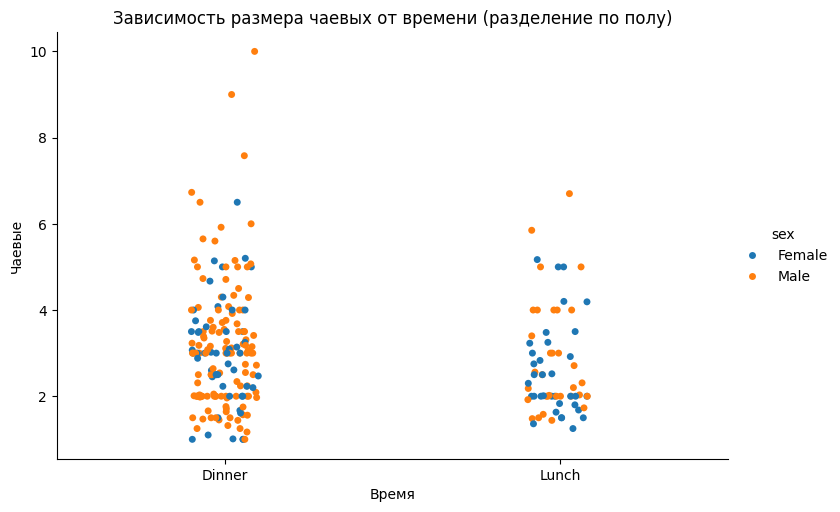

In [16]:
sns.catplot(
    data=df, 
    x="time", 
    y="tip", 
    hue="sex", 
    kind="strip",
    aspect=1.5
)

plt.xlabel('Время')
plt.ylabel('Чаевые')
plt.title("Зависимость размера чаевых от времени (разделение по полу)")
plt.show()

__Покажите на графике зависимость размера чаевых от полного счета и разделите это по полам__

Использовать _lineplot_

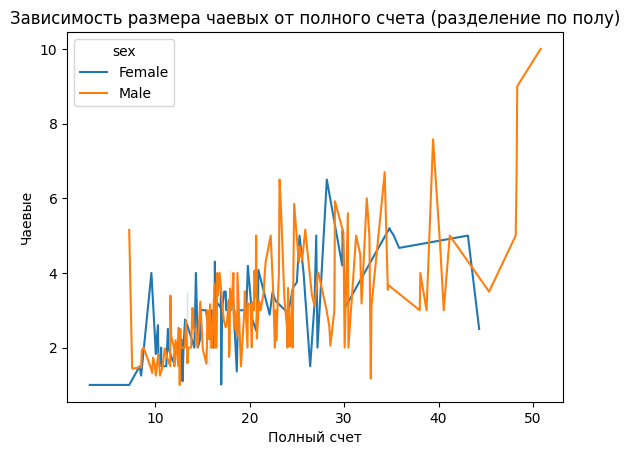

In [17]:
sns.lineplot(
    data=df,
    x="total_bill",
    y="tip",
    hue="sex"
)

# Настройка осей и заголовка
plt.title("Зависимость размера чаевых от полного счета (разделение по полу)")
plt.xlabel("Полный счет")
plt.ylabel("Чаевые")
plt.show()

In [18]:
#Просто выполните
X_1 = df.drop(['tip', 'sex', 'smoker', 'day', 'time'], axis=1)
X_2 = df.drop(['total_bill', 'size', 'tip'], axis=1)
y = np.array(df.drop(['sex', 'total_bill', 'smoker', 'day', 'time', 'size'], axis=1).values)
X_2_clear = pd.get_dummies(X_2)
X = np.array(pd.concat([X_1,X_2_clear], axis=1).values)
print(X)

[[16.99 2 True ... False True False]
 [10.34 3 False ... False True False]
 [21.01 3 False ... False True False]
 ...
 [22.67 2 False ... False True False]
 [17.82 2 False ... False True False]
 [18.78 2 True ... True True False]]


In [19]:
#Просто выполните
features = pd.concat([X_1, X_2_clear], axis=1)
target = df.drop(['sex', 'total_bill', 'smoker', 'day', 'time', 'size'], axis=1)
train_data, test_data, train_target, test_target = train_test_split(features, target, test_size = 0.3, random_state=0)

<font size=3 >__Немного теории__</font>

Мы разберем __основные метрики качества и функционалы потерь__ задачи регрессии. Далее все будем называть __метриками__.

__Метрики необходимы для:__
- поиска оптимального решения
- оценки качества работы модели
- сравнения моделей
- интерпретации результатов



<table border="1" width="100%">
 <tr>
    <td width="50%"> 
        <p> <font size=3> $MAE= \frac{1}{n} \sum_{i=1}^n |y_i-\hat{y_i}|$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                легко интерпретировать 
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                единицы измерения таргета и метрики – эквивалентны
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                устойчива к выбросам 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не ограничена сверху 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не дифференцируема в таком виде 
            </font>
        </p><br/>
        <p> <font size=3> $MSE= \frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                дифференцируема
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                чувствительна к выбросам
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не ограничена сверху 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                сложно интерпретировать 
            </font><br/>
        </p><br/>
        <p> <font size=3> $RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2} $  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                дифференцируема
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                не ограничена сверху 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                еще сложнее интерпретировать 
            </font>
        <p>Основное различие $RMSE$ и $MAE$ заключается в том, что минимизация $RMSE$ сремиться к средней оценке, а  $MAE$ к медиане</p><br/><p>$y$ $-$ истинное значение; $\hat{y}$ $-$ предсказанное значение</p>
        </p><br/>
     </td>
    <td><img src="./errors_2.png" align="right"></td>
 </tr>
</table>

Две попытки __объединить__ положительные __свойства метрик__:
- [Функция потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss): 
    * ведет себя как $MSE$ на ошибках меньше $\sigma$ и как $MAE$ в противном случае. __Что не дает "взрываться" метрике на больших значениях и "жестко" реагирует на маленькие остатки__
    * все так же не удобно дифференцировать
- [Log-Cosh Loss](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0):
    * принимает меньшие значения по сравнению с функцией потерь Хьюбера на всем множестве
    * __дважды дифференцируема__, что необходимо в некоторых методах численной оптимизации.
________________________
__Проблема:__ все предыдущие метрики __не подходят для оценки конкретного решения__ а только для сравнения моделей, что следует из того что __функции не ограничены сверху.__ 

Эта проблема так же решается посредством доработок $MAE$: [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) и [SMAPE](https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error). Однако, подробно рассмотрим метрику $R^2$
и мотивы появления $R^2_{adj}$.

$$R^2=1-\frac{\sum_{i=1}^n (y_i-\hat{y_i})^2}{\sum_{i=1}^n (y_i-\bar{y_i})^2}$$

Данная метрика обладает следующими свойствами:

<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     ограничена сверху и снизу, что позволяет дать оценку конкретному решению без сравнения с другими
</font><br/>
<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     хорошо интерпретируется: на сколько наша модель лучше, чем константное решение
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     не диффиренцируема
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     значение метрики растет (не уменьшается) при добавлении новых переменных, даже если они никак не объясняют целевой показатель. Поэтому нельзя сравнивать модели с разным количеством признаков. Данная проблема решается с помощью $R^2_{adj}$
</font>

$$R^2_{adj}=1-(1-R^2)\frac{n-1}{n-p-1}$$

где $p -$ число признаков, а $n -$ количество объектов

__Рекомендации:__ использовать $R^2_{adj}$ для сравнения моделей и оценки количества переменных, а $R^2$ для оценки качества на новых объектах


__В данном задании вам необходимо реализовать 4 основные метрики:__ $MAE; MSE; RMSE; R^2$

Каждая из метрик принимает на вход 2 одномерных numpy массива:
- __y_true__ - истинные значения 
- __y_predict__ - предсказанные значения

Каждая из функций должна возврашать одно число 



In [20]:
def MAError(y_true, y_predict):
    # Средняя абсолютная ошибка
    error = np.mean(np.abs(y_true - y_predict))
    return error

def MSError(y_true, y_predict):
    # Средняя квадратичная ошибка
    error = np.mean((y_true - y_predict) ** 2)
    return error

def RMSError(y_true, y_predict):
    # Корень из средней квадратичной ошибки
    error = np.sqrt(MSError(y_true, y_predict))
    return error

def R_square(y_true, y_predict):
    # Коэффициент детерминации (R^2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_predict) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def all_metric(y_true, y_predict):
    d = {}
    d['MAE'] = [MAError(y_true, y_predict)] 
    d['MSE'] = [MSError(y_true, y_predict)] 
    d['RMSE'] = [RMSError(y_true, y_predict)]
    d['R_square'] = [R_square(y_true, y_predict)]
    return d

__Обучим модель и сгенерируем данные для проверки функций ошибок__

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
model = LogisticRegression(max_iter=5000)
features, target = load_diabetes(return_X_y=True, as_frame=True)
scaler = StandardScaler()

In [23]:
X = scaler.fit_transform(features)

full = pd.concat([features, target], axis=1)

full_train, full_test = train_test_split(full, test_size=0.2, random_state=42, shuffle=True)

y_train = full_train.target
X_train = full_train.drop("target", axis=1)

In [24]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [25]:
X_test = full_test.drop("target", axis=1)
y_test = full_test.target

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
assert round(MAError(y_true=y_test, y_predict=y_pred), 3) == round(mean_absolute_error(y_test, y_pred), 3), 'Неверно реализован расчёт'

assert round(MSError(y_true=y_test, y_predict=y_pred), 3) == round(mean_squared_error(y_test, y_pred), 3), 'Неверно реализован расчёт'

assert round(RMSError(y_true=y_test, y_predict=y_pred), 3) == round(mean_squared_error(y_test, y_pred, squared=False), 3), 'Неверно реализован расчёт'

assert round(R_square(y_true=y_test, y_predict=y_pred), 3) == round(r2_score(y_test, y_pred), 3), 'Неверно реализован расчёт'

/home/ttsypyshev/data/education/5 term/operational data analysis/lab 6/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$


Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

__Реализуйте функции__
1. __normal_equation__, которая по заданным матрицам (массивам NumPy) X* и *y вычисляет вектор весов  𝑤  согласно нормальному уравнению линейной регрессии.

2. __linear_prediction__, которая принимает на вход матрицу X* и вектор весов линейной модели *w, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы X* с весами *w.

In [29]:
def normal_equation(X, y):
    X = X.astype(np.float64)
    y = y.astype(np.float64)

    # X = np.c_[np.ones(X.shape[0]), X]

    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

def linear_prediction(X, w):
    # X = np.c_[np.ones(X.shape[0]), X]
    
    ans = X @ w
    return ans


norm_eq_weights = normal_equation(train_data, train_target)
print(norm_eq_weights)

             tip
0  -2.613954e-01
1   2.099085e+01
2  -3.113428e+14
3  -3.113428e+14
4   1.141590e+15
5   1.141590e+15
6  -8.302475e+14
7  -8.302475e+14
8  -8.302475e+14
9  -8.302475e+14
10 -3.578625e+01
11 -1.827563e+01


In [30]:
tip_pred = MSError(test_target.to_numpy(), linear_prediction(test_data.to_numpy(), norm_eq_weights))
print(tip_pred)

assert round(MSError(test_target.to_numpy(), linear_prediction(test_data.to_numpy(), norm_eq_weights)), 3) <= 62.253, 'Не верно реализован расчёт'

1234.5433343010982


AssertionError: Не верно реализован расчёт

In [31]:
# Просто выполнить
LinReg = LinearRegression()
LinReg.fit(train_data, train_target)
ans1 = LinReg.predict(test_data)

In [32]:
# Просто выполнить
mean_squared_error(test_target, ans1)

np.float64(0.9550808988617137)